In [14]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time
import sys
import matplotlib.pyplot as plt
import math
import os
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
import scanpy as sc
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# CellAtlas_Percent clean 

## User input 

In [19]:
# Shannon diversity
# Set filepaths 
input_filepath = "/Users/timnoahkempchen/Library/CloudStorage/GoogleDrive-timkem@stanford.edu/Meine Ablage/Datasets/data/22_08_09_CellAtlas_only_Processed_Metadata.csv"
output_filepath = "/Users/timnoahkempchen/Downloads/Output_test"

# mandatory 
## define column that defines replicates 
rep ='unique_region'

## specify column used to group the data 
group_com = 'community' # order can specify the order in which group_com is plotted on the x axis 
# used by helper function 
## a column name from the input dataframe, defines the category for which the percentage will be calculated
per_categ = 'Cell Type' 
## a column name from the input dataframe, defines a subset of the data to use
sub_column = 'Major Cell Cat'
## define string which is used to subset sub_column  
sub_l = ['Immune','Epithelial','Mesenchymal']

# optional
## Set specific colors for figure 
coloring = None
## Specify order for x axis 
ordering = None 
## Save figure - boolean 
save = True
## change figure size 
fig_size=8

# Stacked bar plot
per_cat = "Major Cell Cat"
grouping = 'consensus diagnosis'
cell_list = list(df['Major Cell Cat'].unique())
norm=True
save_name= 'Major_subConsensus'
col_order=None
sub_col= 'Cell Type'
name_cat = 'Cell Type'
fig_sizing=(8,4)
h_order=con_order
pal_color=None
remove_leg=False
save_path = "/Users/timnoahkempchen/Downloads/TestFolder/"

# Swarm plot 
rep ='cons_replicate'
sub_list = ['CD4+ Treg']

## Functions

In [7]:
# Shannon diversity 
# load functions from file 
sys.path.append("/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_percent/")
from Shannon_diversity_function import *
from CellAtlas_cell_type_composition import *

## Load data 

In [8]:
# Shannon diversity 
# load data
df = pd.read_csv(input_filepath, index_col=0)
df.columns

Index(['CHGA', 'MMP9', 'CD36', 'CK7', 'PDL1', 'Bcatenin', 'Vimentin', 'FoxP3',
       'CD56', 'CD31', 'pH2AX', 'CD90', 'CD15', 'PD1', 'aSMA', 'CD25', 'Ki67',
       'Cytokeratin', 'CD20', 'CD4', 'CD11c', 'AnnexA1', 'Nestin', 'p53',
       'CD73', 'EGFR', 'MUC5AC', 'HLADR', 'COX2', 'BCL2', 'p63', 'CD3', 'MUC2',
       'CD8', 'CD45', 'PGA3', 'CD57', 'CD68', 'aDef5', 'CD34', 'Podoplanin',
       'CD38', 'CD11b', 'CD163', 'MUC1', 'CD138', 'Arginase1', 'PP', 'CD79a',
       'MUC6', 'region', 'x', 'y', 'sample', 'region_num', 'CD206', 'CollIV',
       'unique_region', 'Accession_number', 'Block_ID', 'Sample_type',
       'neigh_name', 'neigh_sub', 'community', 'community common', 'Cell Type',
       'Core Type', 'Accession number', 'Sample', 'Block type',
       'Initial block diagnosis', '% invasive', '%dysplasia',
       '%metaplasia+columnar', '% normal squam mucosa', '% HG dyspalsia',
       '% LG dysplasia', '% Glandular', '% metaplasia', 'consensus diagnosis',
       'Sub diagnosis', '

### Further adjustments (e.g. plotting order)

In [10]:
# specify certain orders for plotting 
# Note: you have to load the df before 

con_order = ['NE','M', 'D','T']
sub_order = ['NE','NE, M','NE, T', 'M','MD', 'MDT','DT','T']
df['cons_replicate']=df['sample']+'_'+df['consensus diagnosis']
df['sub_replicate']=df['sample']+'_'+df['Sub diagnosis']
df['cons_replicate'].unique()

comm_list = list(df.community.unique())
neigh_list = list(df.neigh_name.unique())

## Analysis

### Shannon diversity function

/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_percent/Shannon_diversity_function.py:81: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_order = res.groupby(group_com).mean().reset_index().sort_values(by='Shannon Diversity')[group_com].to_list()
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


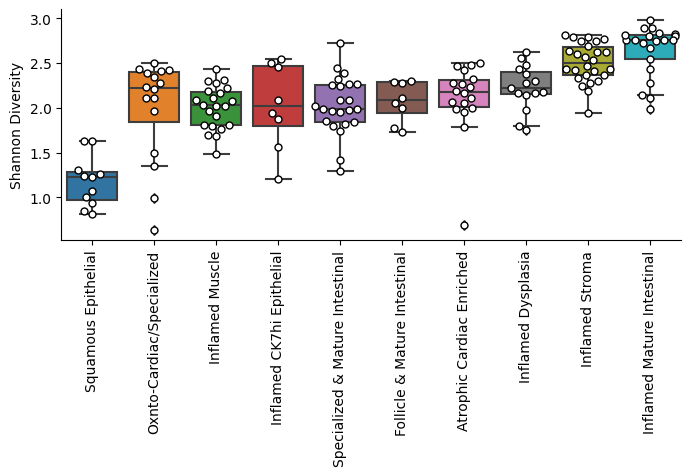

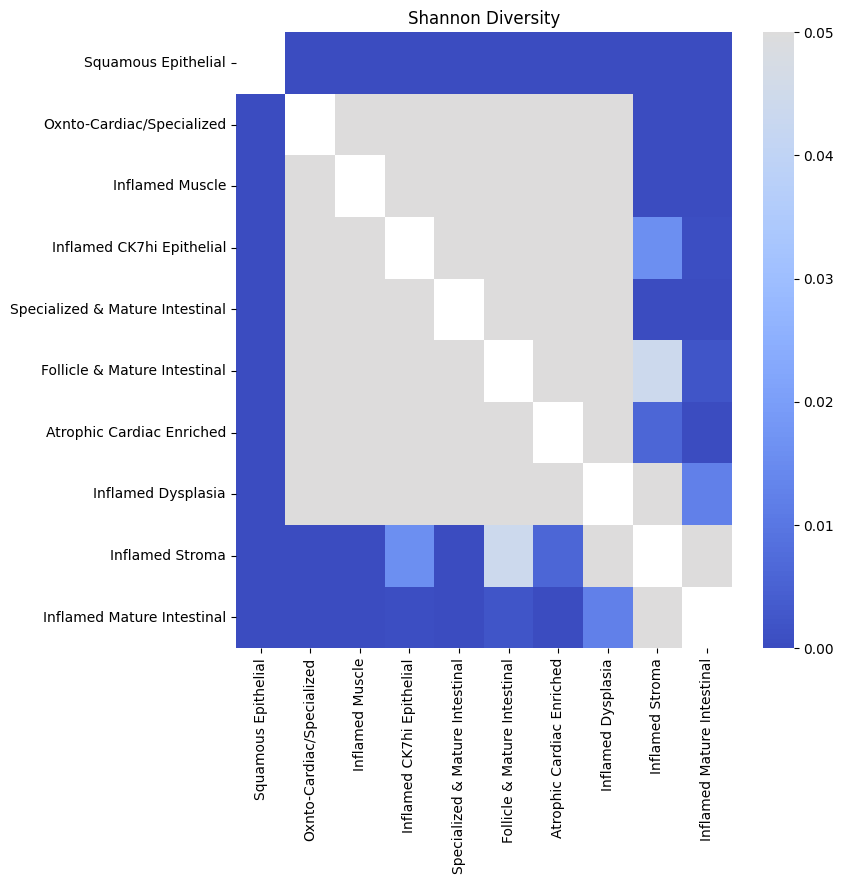

In [11]:
result, pval, tukey_tab = Shan_div(data1=df, sub_l = sub_l,\
        group_com = group_com, per_categ = per_categ,\
        rep=rep, sub_column=sub_column,normalize=True, save=save,\
                          coloring= coloring, fig_size=fig_size, ordering=ordering, output_filepath = output_filepath)

### Stacked Barplot

/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_percent/CellAtlas_cell_type_composition.py:57: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  col_order = melt_test.groupby(grouping).sum().reset_index().sort_values(by='percent')[grouping].to_list()


NameError: name 'save_path' is not defined

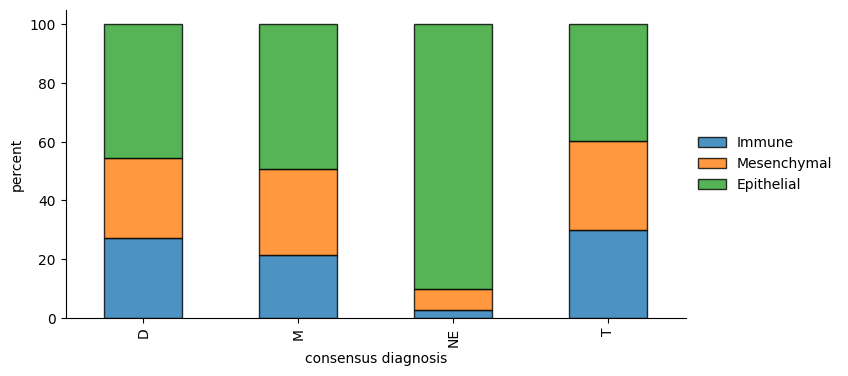

In [20]:
#order_tis = ['M1 Macrophage', 'M2 Macrophage']
#h_ordertu = ['Mucosa', 'Muscularis mucosa', 'Submucosa', 'Muscularis externa']
ab = stacked_bar_plot(data = df, per_cat = per_cat, grouping = grouping, sub_col= None,\
          cell_list = cell_list, norm=False,fig_sizing=fig_sizing, name_cat = per_cat,  \
                    col_order=col_order, save_name=save_name, pal_color=pal_color,) #h_order=h_ordertu,  pal_color=col_map

### Swarm boxplot 

/Users/timnoahkempchen/Desktop/SAP/Clean_functions/CellAtlas_percent/CellAtlas_cell_type_composition.py:134: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_order = melt_per_plot.groupby(per_cat).mean().reset_index().sort_values(by='percentage')[per_cat].to_list()


NameError: name 'save_path' is not defined

<Figure size 150x300 with 0 Axes>

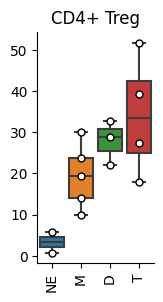

In [18]:
total_neigh_st = swarm_box(data=df, grouping=grouping, replicate= rep,\
                           sub_col=sub_col, sub_list=sub_list, norm=False, per_cat= per_cat, \
                           figure_sizing=(1.5,3), save_name='sig_imm_cons', pal_color=None, h_order=h_order,\
                           flip=True)